In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
%matplotlib inline

In [2]:
# Get today's date and data 5 years ago
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=5)

In [3]:
# Download stock data from yahoo finance
btc = yf.download('BTC-USD', start=start_date, end=end_date)
eth = yf.download('ETH-USD', start=start_date, end=end_date)
ltc = yf.download('LTC-USD', start=start_date, end=end_date)
xrp = yf.download('XRP-USD', start=start_date, end=end_date)

C:\Users\Vanessa\AppData\Local\Temp\ipykernel_15196\3496587961.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download('BTC-USD', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Vanessa\AppData\Local\Temp\ipykernel_15196\3496587961.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth = yf.download('ETH-USD', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Vanessa\AppData\Local\Temp\ipykernel_15196\3496587961.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ltc = yf.download('LTC-USD', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Vanessa\AppData\Local\Temp\ipykernel_15196\3496587961.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  xrp = yf.downl

In [4]:
import os
os.makedirs ('data', exist_ok=True)
btc.to_csv('data/btc.csv')
eth.to_csv('data/eth.csv')
ltc.to_csv('data/ltc.csv')
xrp.to_csv('data/xrp.csv')


In [5]:
btc.head()
eth.head()
ltc.head()
xrp.head()

Price,Close,High,Low,Open,Volume
Ticker,XRP-USD,XRP-USD,XRP-USD,XRP-USD,XRP-USD
Date,,,,,
2020-12-29,0.220962,0.248318,0.174831,0.247673,12970077098
2020-12-30,0.211828,0.235360,0.194670,0.220902,8894036560
2020-12-31,0.219846,0.227613,0.206465,0.211787,5363979601
2021-01-01,0.237444,0.249270,0.217288,0.219845,5888429287
2021-01-02,0.221655,0.238388,0.215816,0.237670,4773658725


In [6]:
# print summary statistics for each cryptocurrency
display(btc.describe())
display(eth.describe())
display(ltc.describe())
display(xrp.describe())

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,54346.915442,55378.037008,53187.962534,54316.262121,3.719139e+10
std,29453.627673,29858.514351,29014.650587,29450.292806,2.304716e+10
min,15787.284180,16253.047852,15599.046875,15782.300781,5.331173e+09
25%,29355.945312,29852.853516,28958.642578,29345.182617,2.133532e+10
50%,46391.421875,47401.718750,45115.093750,46354.792969,3.184701e+10
75%,69010.746094,70023.238281,67497.640625,68949.554688,4.719627e+10
max,124752.531250,126198.070312,123196.046875,124752.140625,3.509679e+11


Price,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
count,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,2531.365014,2597.912070,2457.012994,2530.353662,1.953464e+10
std,914.075819,939.314257,888.275408,915.334267,1.294480e+10
min,730.367554,737.952881,692.149414,730.358704,2.081626e+09
25%,1790.764160,1825.059814,1734.128479,1790.842468,1.025234e+10
50%,2441.607178,2522.360596,2359.384766,2439.944824,1.643453e+10
75%,3234.704468,3322.586060,3122.291260,3234.563843,2.500993e+10
max,4831.348633,4953.732910,4718.039062,4831.088379,9.773662e+10


Price,Close,High,Low,Open,Volume
Ticker,LTC-USD,LTC-USD,LTC-USD,LTC-USD,LTC-USD
count,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,105.111243,108.638455,101.379691,105.156958,1.367868e+09
std,49.463228,52.488728,46.213908,49.499514,2.158368e+09
min,43.300301,46.132015,40.680405,43.314003,1.207859e+08
25%,70.940205,72.368317,69.294807,70.940468,3.817291e+08
50%,89.953346,92.158066,87.341133,89.976685,6.107978e+08
75%,120.429813,124.888462,115.791573,120.480122,1.223540e+09
max,386.450775,412.960144,345.298828,387.869171,1.799426e+10


Price,Close,High,Low,Open,Volume
Ticker,XRP-USD,XRP-USD,XRP-USD,XRP-USD,XRP-USD
count,1827.000000,1827.000000,1827.000000,1827.000000,1.827000e+03
mean,1.022536,1.055125,0.986672,1.021632,3.554256e+09
std,0.822763,0.848759,0.795839,0.822693,4.347646e+09
min,0.211828,0.227613,0.174831,0.211787,2.253910e+08
25%,0.485249,0.494810,0.471241,0.484836,1.115672e+09
50%,0.611422,0.625373,0.593283,0.611405,2.046393e+09
75%,1.205400,1.260015,1.144738,1.197358,4.186426e+09
max,3.555765,3.650210,3.430836,3.555637,5.172338e+10


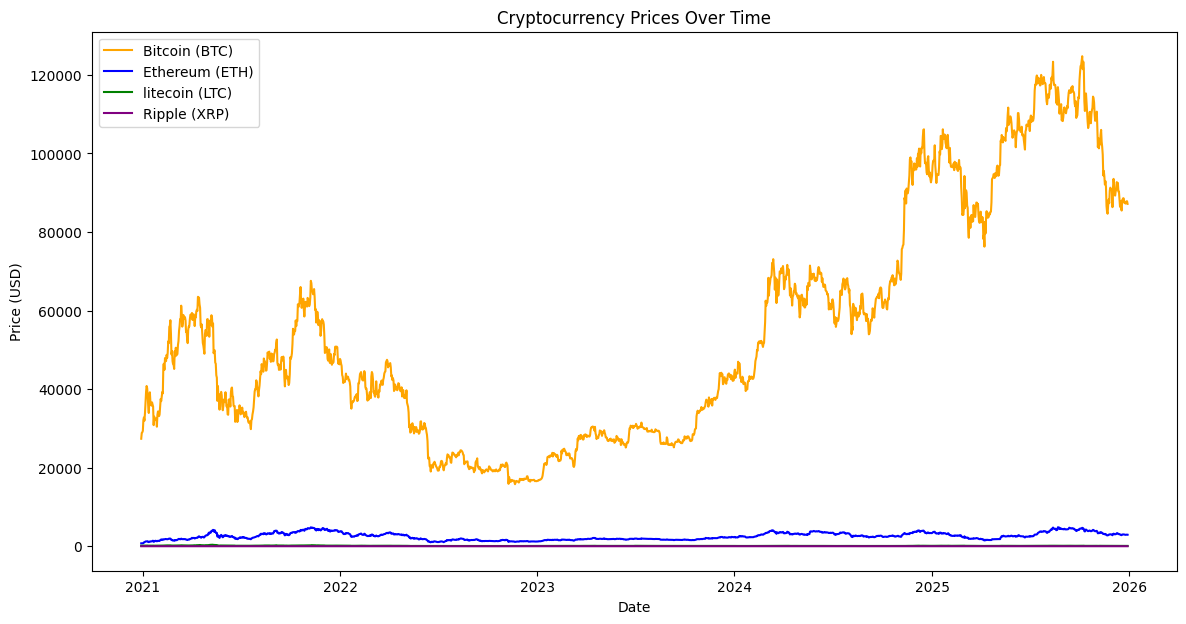

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(btc.index, btc['Close'], label='Bitcoin (BTC)', color='orange')
plt.plot(eth.index, eth['Close'], label='Ethereum (ETH)', color='blue')
plt.plot(ltc.index, ltc['Close'], label='litecoin (LTC)', color='green')
plt.plot(xrp.index, xrp['Close'], label='Ripple (XRP)', color='purple')
plt.title('Cryptocurrency Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Distribution of Log Return BTC

In [8]:
btc['Close'].head()

Ticker,BTC-USD
Date,
2020-12-29,27362.437500
2020-12-30,28840.953125
2020-12-31,29001.720703
2021-01-01,29374.152344
2021-01-02,32127.267578


In [9]:
btc[('Close', 'BTC-USD')].head()

Date
2020-12-29    27362.437500
2020-12-30    28840.953125
2020-12-31    29001.720703
2021-01-01    29374.152344
2021-01-02    32127.267578
Name: (Close, BTC-USD), dtype: float64

In [10]:
btc.columns
type(btc.columns)

pandas.core.indexes.multi.MultiIndex

In [11]:
# Calculate the log daily return from each cryptocurrency
# BTC data log daily return
btc['Log Daily Return'] = np.log(btc['Close']).shift(1) - np.log(btc['Close'])
# ETH data log daily return
eth['Log Daily Return'] = np.log(eth['Close']).shift(1) - np.log(eth['Close'])
# LTC data log daily return
ltc['Log Daily Return'] = np.log(ltc['Close']).shift(1) - np.log(ltc['Close'])
# XRP data log daily return
xrp['Log Daily Return'] = np.log(xrp['Close']).shift(1) - np.log(xrp['Close'])

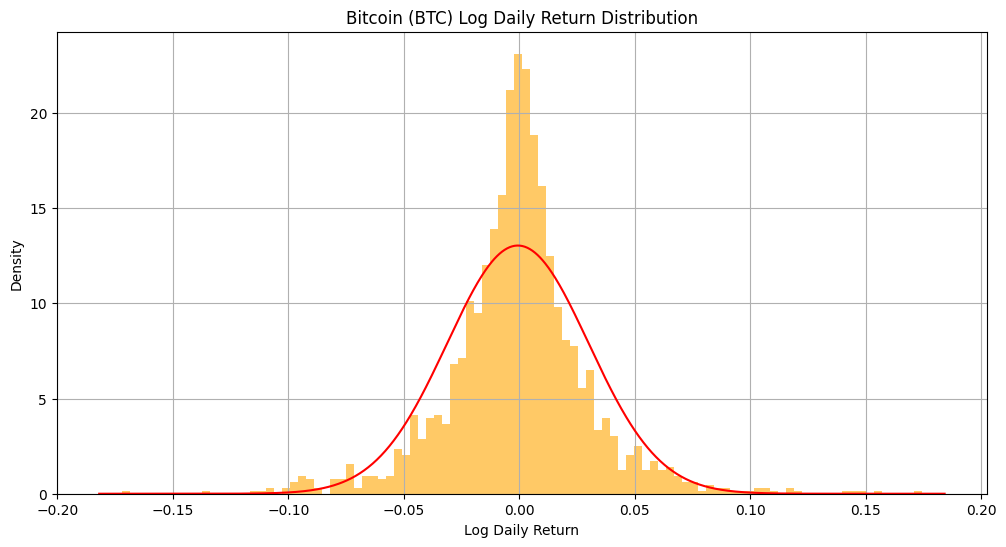

In [12]:
# Plot a histogram to show the distribution of log return of PLTR's stock. 
from scipy.stats import norm
mu = btc['Log Daily Return'].mean()
sigma = btc['Log Daily Return'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.linspace(
    btc['Log Daily Return'].min() - 0.01,
    btc['Log Daily Return'].max() + 0.01,
    1000
)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

btc['Log Daily Return'].hist(
    bins=100, density=True, alpha=0.6, color='orange', figsize=(12, 6)
)
plt.plot(density['x'], density['pdf'], 'r')

plt.title('Bitcoin (BTC) Log Daily Return Distribution')
plt.xlabel('Log Daily Return')
plt.ylabel('Density')
plt.show()

In [13]:
# Probability that the BTC log daily return will drop over 5% in a day
prob_return1= norm.cdf(-0.05, mu, sigma)
print(f'Probability that the BTC log daily return will drop over 5%: {prob_return1:.4f}')


Probability that the BTC log daily return will drop over 5%: 0.0533


In [14]:
# drop over 100% in 220 days
prob_return2= norm.cdf(-1.00, 220*mu, sigma*np.sqrt(220))
print(f'Probability that the BTC log return will drop over 100% in 220 days: {prob_return2:.4f}')

Probability that the BTC log return will drop over 100% in 220 days: 0.0290


In [15]:
# increase over 100% in 220 days
prob_return3= 1 - norm.cdf(1.00, 220*mu, sigma*np.sqrt(220))
print(f'Probability that the BTC log return will increase over 100% in 220 days: {prob_return3:.4f}')

Probability that the BTC log return will increase over 100% in 220 days: 0.0060


Calculate Value at Risk (VaR)

In [16]:
# Calculate Value at Risk (VaR) at 95% confidence level for BTC
confidence_level = 0.95
VaR_95 = norm.ppf(1-confidence_level, mu, sigma)
print(f'1-day Value at Risk (VaR) at 95% confidence level for BTC: {VaR_95:.4f}')

1-day Value at Risk (VaR) at 95% confidence level for BTC: -0.0510


In [17]:
# Calculate Value at Risk (VaR) at 50% confidence level for BTC
confidence_level_50 = 0.50
VaR_50 = norm.ppf(1-confidence_level_50, mu, sigma)
print(f'1-day Value at Risk (VaR) at 50% confidence level for BTC: {VaR_50:.4f}')

1-day Value at Risk (VaR) at 50% confidence level for BTC: -0.0006


In [18]:
# Quantile
# 25% Quantile
quantile_25 = norm.ppf(0.25, mu, sigma)
print(f'25% Quantile of BTC log daily return: {quantile_25:.4f}')
# 75% Quantile
quantile_75 = norm.ppf(0.75, mu, sigma)
print(f'75% Quantile of BTC log daily return: {quantile_75:.4f}')

25% Quantile of BTC log daily return: -0.0213
75% Quantile of BTC log daily return: 0.0200


COVARIANCE

In [19]:
# Create a DataFrame to hold log daily returns of all cryptocurrencies
Log_returns = pd.DataFrame({
    'BTC': btc['Log Daily Return'],
    'ETH': eth['Log Daily Return'],
    'LTC': ltc['Log Daily Return'],
    'XRP': xrp['Log Daily Return']
})
display(Log_returns.head())

,BTC,ETH,LTC,XRP
Date,,,,
2020-12-29,NaN,NaN,NaN,NaN
2020-12-30,-0.052625,-0.027105,-0.003290,0.042216
2020-12-31,-0.005559,0.018552,0.037586,-0.037153
2021-01-01,-0.012760,0.010129,-0.012275,-0.077005
2021-01-02,-0.089590,-0.058715,-0.081470,0.068810


In [20]:
# Covariance matrix of log daily returns
cov_matrix = Log_returns.cov()
display(cov_matrix)

,BTC,ETH,LTC,XRP
BTC,0.000936,0.001027,0.000998,0.000944
ETH,0.001027,0.001700,0.001410,0.001298
LTC,0.000998,0.001410,0.002077,0.001512
XRP,0.000944,0.001298,0.001512,0.002665


In [21]:
# Correlation matrix of log daily returns
corr_matrix = Log_returns.corr()
display(corr_matrix)

,BTC,ETH,LTC,XRP
BTC,1.000000,0.813992,0.715554,0.597582
ETH,0.813992,1.000000,0.750534,0.610024
LTC,0.715554,0.750534,1.000000,0.642797
XRP,0.597582,0.610024,0.642797,1.000000


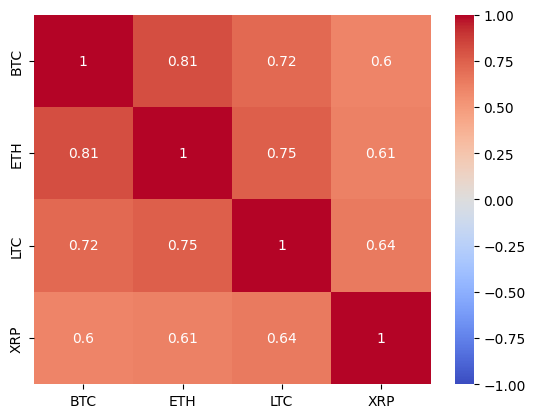

In [22]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

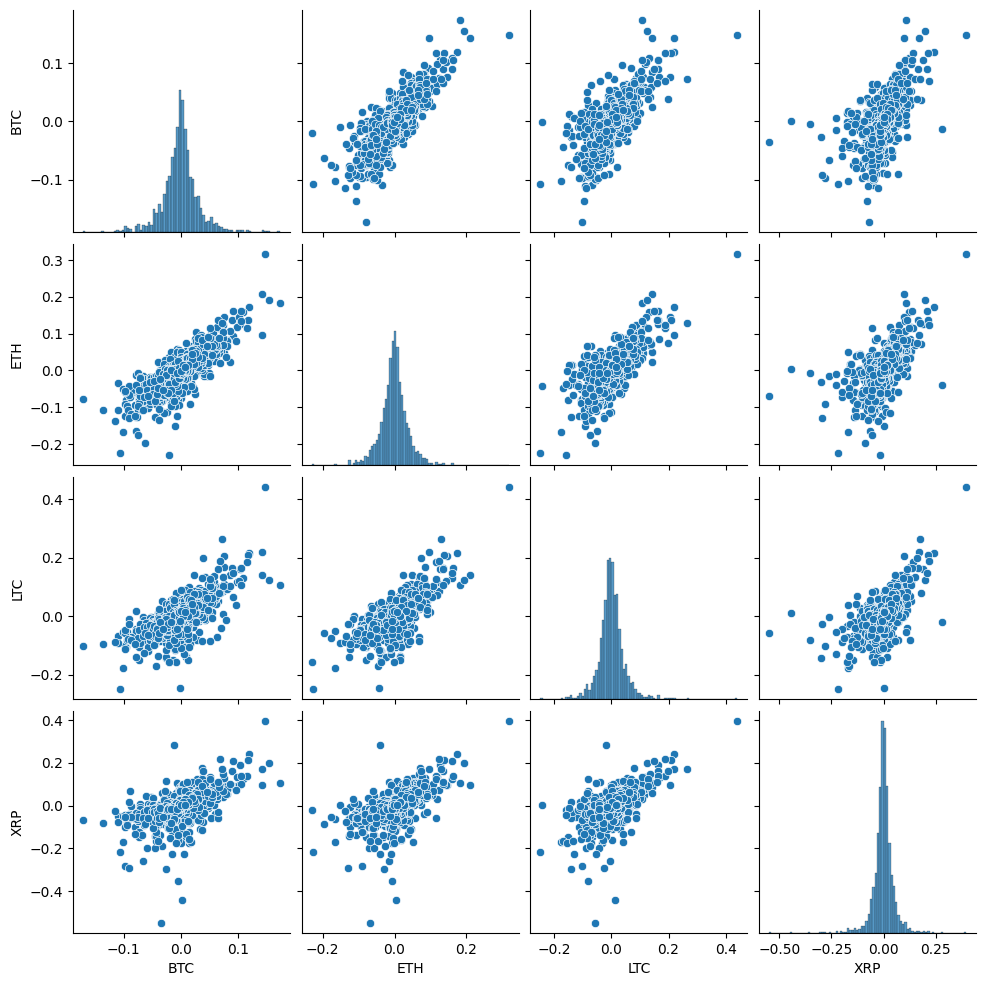

In [23]:
# Scatter plot matrix of log daily returns
sns.pairplot(Log_returns)
plt.show()

In [24]:
import warnings
warnings.filterwarnings('ignore')


In [25]:
# Due to the timezone issues with different cryptocurrencies, we extract and calculate appropriate stock market data for analysis
# Indicepanel is the dataframe of our trading model

panel = pd.DataFrame(index=btc.index)

# Dependent variable: BTC log daily return
panel['btc_ret'] = btc['Close'].pct_change()

# Independent variable: ETH log daily return
panel['eth_ret'] = eth['Close'].pct_change()
# Independent variable: LTC log daily return
panel['ltc_ret'] = ltc['Close'].pct_change()
# Independent variable: XRP log daily return
panel['xrp_ret'] = xrp['Close'].pct_change()

# Drop missing values
panel = panel.dropna()

In [26]:
# Define Y and X
Y = panel['btc_ret']
X = panel[['eth_ret', 'ltc_ret', 'xrp_ret']]

# Add a constant to regression intercept
import statsmodels.api as sm
X = sm.add_constant(X)

In [27]:
# Run the regression
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                btc_ret   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1299.
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:52:37   Log-Likelihood:                 4820.3
No. Observations:                1826   AIC:                            -9633.
Df Residuals:                    1822   BIC:                            -9611.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.361      0.7

In [28]:
# Create lagged variables for independent variables (1-day lag)
panel['eth_ret_lag1'] = panel['eth_ret'].shift(1)
panel['ltc_ret_lag1'] = panel['ltc_ret'].shift(1)
panel['xrp_ret_lag1'] = panel['xrp_ret'].shift(1)


In [29]:
# Drop missing values after creating lagged variables
panel = panel.dropna()

In [30]:
Y = panel['btc_ret']
X = panel[['eth_ret','ltc_ret','xrp_ret','eth_ret_lag1', 'ltc_ret_lag1', 'xrp_ret_lag1']]

import statsmodels.api as sm
X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                btc_ret   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     654.1
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:52:37   Log-Likelihood:                 4824.3
No. Observations:                1825   AIC:                            -9635.
Df Residuals:                    1818   BIC:                            -9596.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.000      0.400   

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split into train and test (80% train, 20%test)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, shuffle=False)

# Fit model on training set
model = sm.OLS(y_train, X_train).fit()

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print("Test RMSE:", rmse)
print("Test R2:", r2)

Test RMSE: 0.013434108907522816
Test R2: 0.6237570675601108


In [32]:
# Put results into a DataFrame for easy comparison
results = pd.DataFrame({"Actual":y_test,"Predicted":y_pred}, index=y_test.index)

# Add signal column (up if predicted > 0, down if predicted < 0)
results["Signal"] = results ["Predicted"].apply(lambda x: "📈 Up" if x > 0 else "📉 Down")

print(results.tail(10)) #Show last 10 rows

              Actual  Predicted  Signal
Date                                   
2025-12-20  0.002731   0.000279    📈 Up
2025-12-21  0.003144   0.001492    📈 Up
2025-12-22 -0.001486   0.001062    📈 Up
2025-12-23 -0.012160  -0.007371  📉 Down
2025-12-24  0.002265  -0.005090  📉 Down
2025-12-25 -0.004306  -0.007049  📉 Down
2025-12-26  0.000764   0.006560    📈 Up
2025-12-27  0.005736   0.010924    📈 Up
2025-12-28  0.000384  -0.003491  📉 Down
2025-12-29 -0.007696  -0.006020  📉 Down


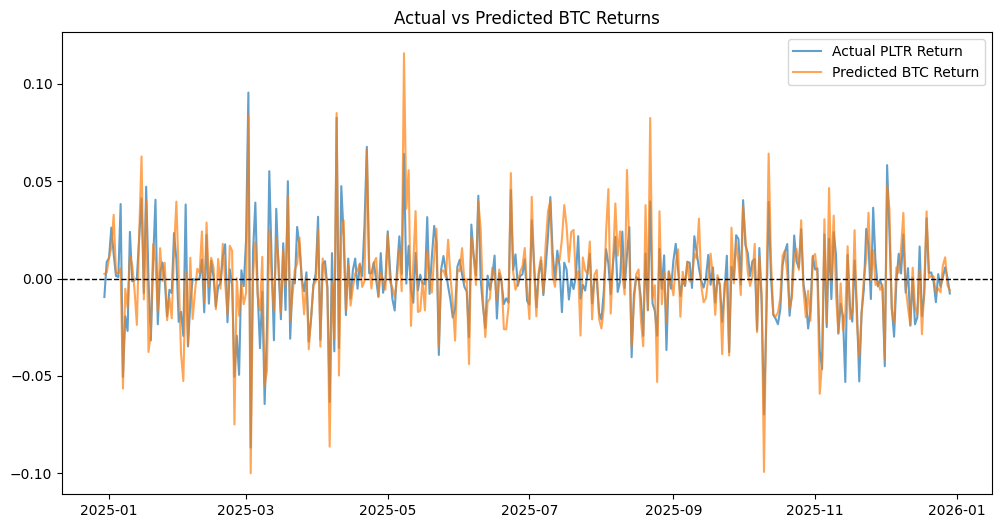

In [33]:
# Plot actual vs predicted returns
plt.figure(figsize =(12,6))
plt.plot(results.index, results["Actual"], label="Actual PLTR Return", alpha=0.7)
plt.plot(results.index, results["Predicted"], label="Predicted BTC Return", alpha=0.7)
plt.axhline(0, color="black", linewidth=1, linestyle="--")  # Zero line
plt.legend()
plt.title("Actual vs Predicted BTC Returns")
plt.show()

In [34]:
# Compare actual vs predicted direction
results["Correct"] = ((results["Actual"] > 0) & (results["Predicted"] > 0)) | \
                     ((results["Actual"] < 0) & (results["Predicted"] < 0))

accuracy = results["Correct"].mean() * 100
print(f"Directional Accuracy: {accuracy:.2f}%")

Directional Accuracy: 82.19%


In [35]:
# Take the last row of features
latest_X = X.iloc[[-1]] #double brackets keep it DataFrame

# Predict tomorrow's BTC return
predicted_tomorrow = model.predict(latest_X)[0]

print("Predicted BTC return for tomorrow:", predicted_tomorrow)

if predicted_tomorrow > 0:
    print("📈 Model suggests BTC will go UP tomorrow")
else:
    print("📉 Model suggests BTC will go DOWN tomorrow")

Predicted BTC return for tomorrow: -0.006020130508403894
📉 Model suggests BTC will go DOWN tomorrow
